In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

# 0. Import data

In [150]:
df = pd.read_csv('data/measurements.csv')

In [151]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


# 1. Data cleaning

### Checking null/nan values & data types

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


No nulls, but data types needs to be corrected.

In [153]:
df.isna().sum()/len(df)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.966495
refill gas       0.966495
dtype: float64

Nans that are more than the 75% of the data points are going to be deleted. For temp_inside, nans are going to be replacef by the average.

### Check duplicates

In [154]:
df.duplicated().sum()

0

### Convert data types

In [155]:
# replaceing the comma
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["temp_inside"]=df["temp_inside"].str.replace(',', '.')
df["refill liters"]=df["refill liters"].str.replace(',', '.')

# changing data type
df["distance"]=df["distance"].astype('float64')
df["consume"]=df["consume"].astype('float64')
df["temp_inside"]=df["temp_inside"].astype('float64')
df["refill liters"]=df["refill liters"].astype('float64')

# replacing nans
df["temp_inside"]=df["temp_inside"].fillna(np.mean(df["temp_inside"]))



### Drop columns with no information

In [156]:
df.drop(columns=['specials', 'refill liters', 'refill gas'], axis=1, inplace=True)

### Check results

In [157]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


### Save clean data file

In [158]:
df.to_csv('data/measurements_clean.csv')

# 2. Exploratory Data Analysis

In [159]:
!pip install ydata-profiling

In [160]:
from ydata_profiling import ProfileReport

In [161]:
profile = ProfileReport(df, title="Car Fuel Consumption")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Save data profile

In [162]:
profile.to_file("car_fuel_consumption_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Comparing data related to the use of Gas Type

In [163]:
df['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [164]:
df_SP98 = df[df["gas_type"] == 'SP98']
df_E10 = df[df["gas_type"] == 'E10']

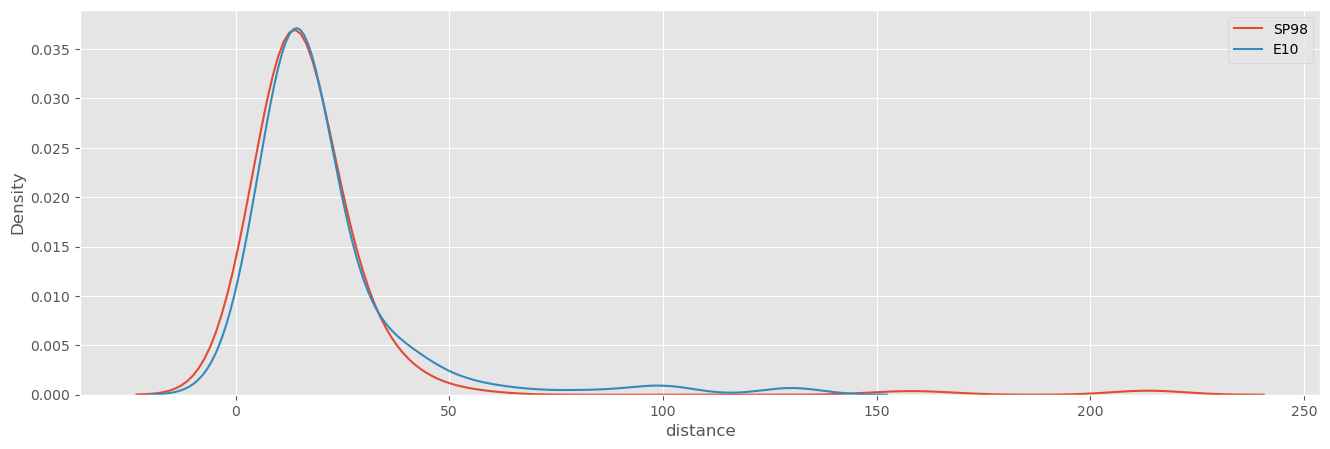

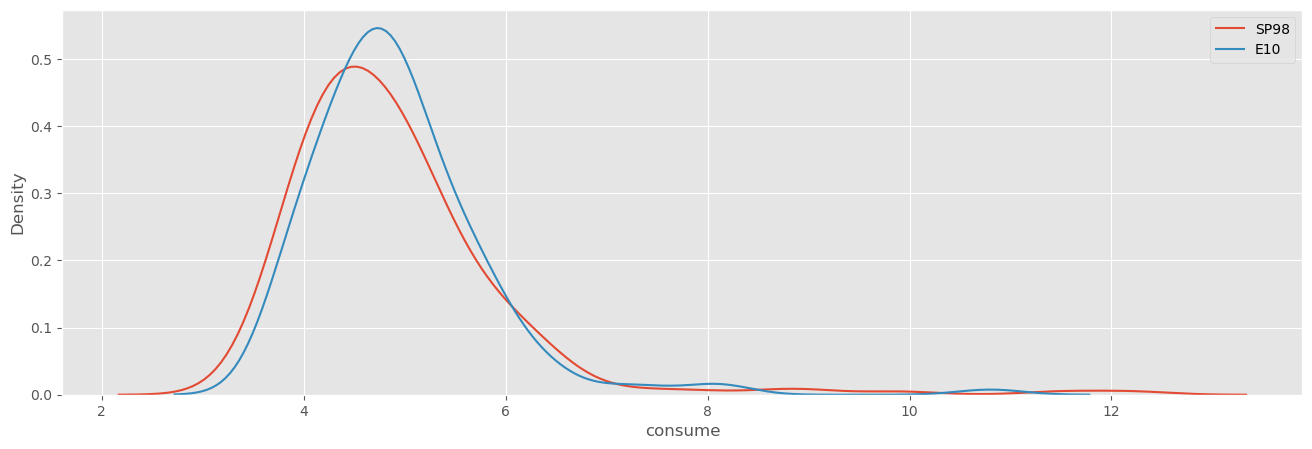

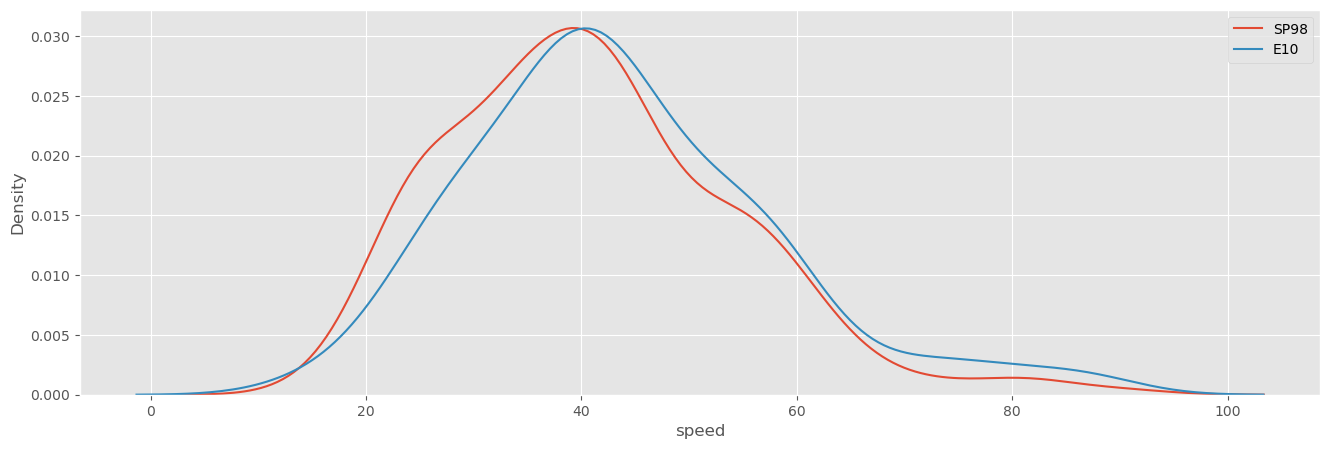

In [165]:
compare_features = ['distance', 'consume', 'speed']

for feature in compare_features:
    plt.figure(figsize=(16,5))
    fig = sns.kdeplot(df_SP98[feature])
    fig = sns.kdeplot(df_E10[feature])
    plt.legend(['SP98', 'E10'])
    plt.show()

It looks like E10 tends to consume more gas than the previous SP98. Cars also seem to run faster, which may explain this difference. But we need more analysis to get a proper conclusion.

### Gas type vs. Consumption

gas_type       E10       SP98
mean       4.93125   4.899123
median     4.80000   4.700000
amin       3.70000   3.300000
amax      10.80000  12.200000




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



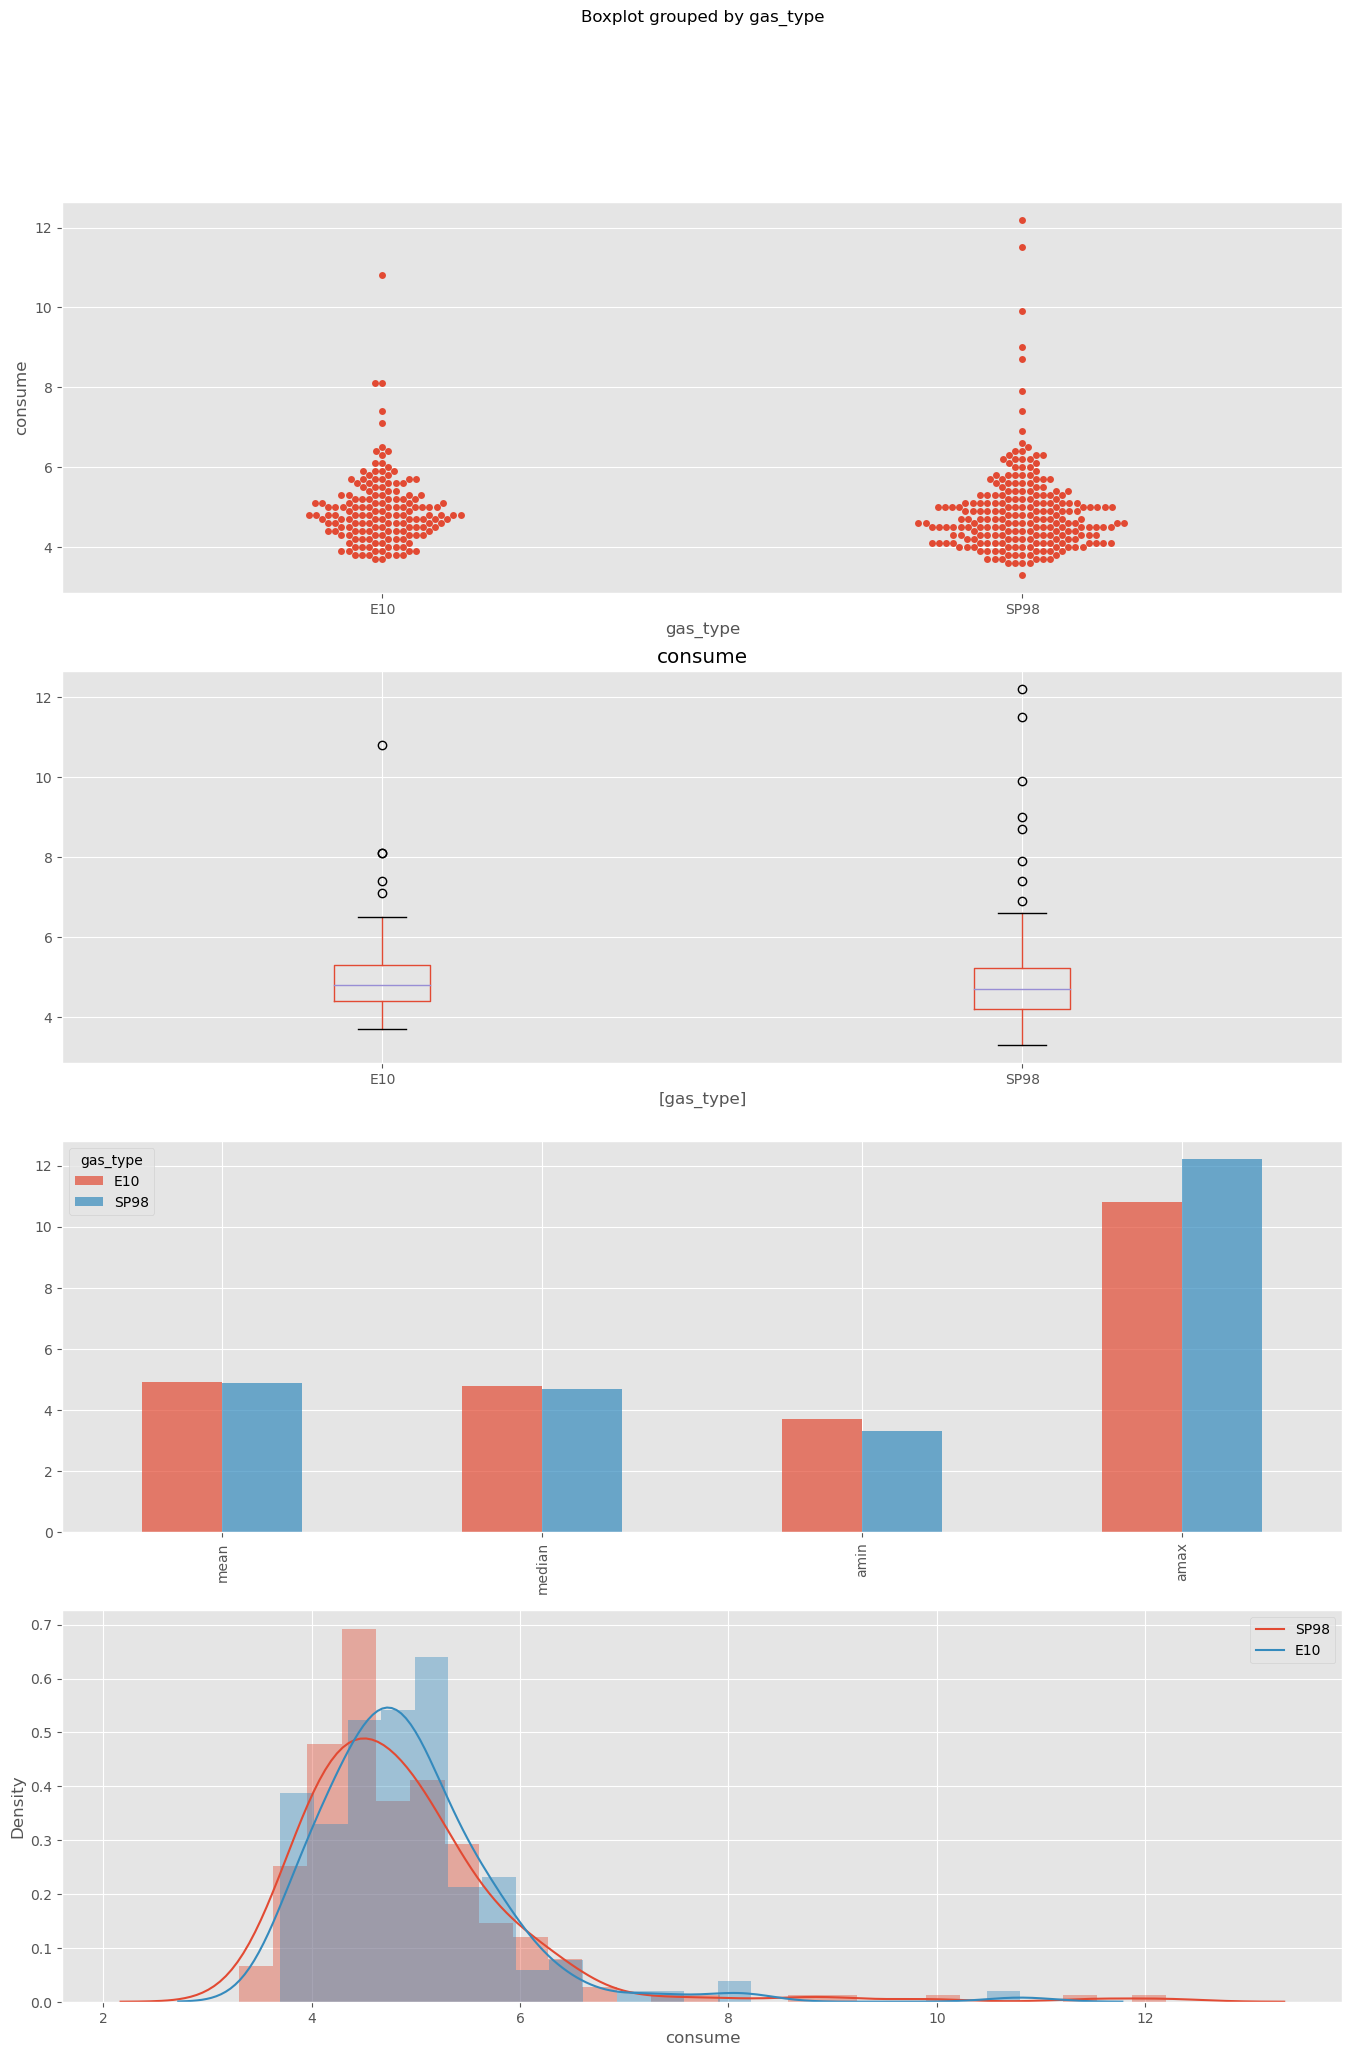

In [170]:
plt.figure(figsize=(16,24))

t=df[["consume","gas_type"]]
c = df.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])

ax1=plt.subplot(4,1,1)
sns.swarmplot(x=df['gas_type'],
              y=df['consume'], ax=ax1)

ax2=plt.subplot(4,1,2)
k2=t.boxplot(by="gas_type",ax=ax2)                                      

ax3=plt.subplot(4,1,3)
df_T = pd.DataFrame(c.values.T, columns=c.index, index=c.columns)
print(df_T)
k3=df_T.plot(kind="bar",ax=ax3, alpha=0.7)


ax4=plt.subplot(4,1,4)
sns.distplot(t[t.gas_type=="SP98"]["consume"],ax=ax4)
sns.distplot(t[t.gas_type=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])


### AC vs. Consumption

AC             0          1
mean     4.88352   5.256667
median   4.70000   4.900000
amin     3.30000   4.000000
amax    11.50000  12.200000


/var/folders/8f/gg3d93d120s3hxst3s0295kc0000gn/T/ipykernel_2745/34517934.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.AC==1].consume,ax=ax4)
/var/folders/8f/gg3d93d120s3hxst3s0295kc0000gn/T/ipykernel_2745/34517934.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.AC==0].co

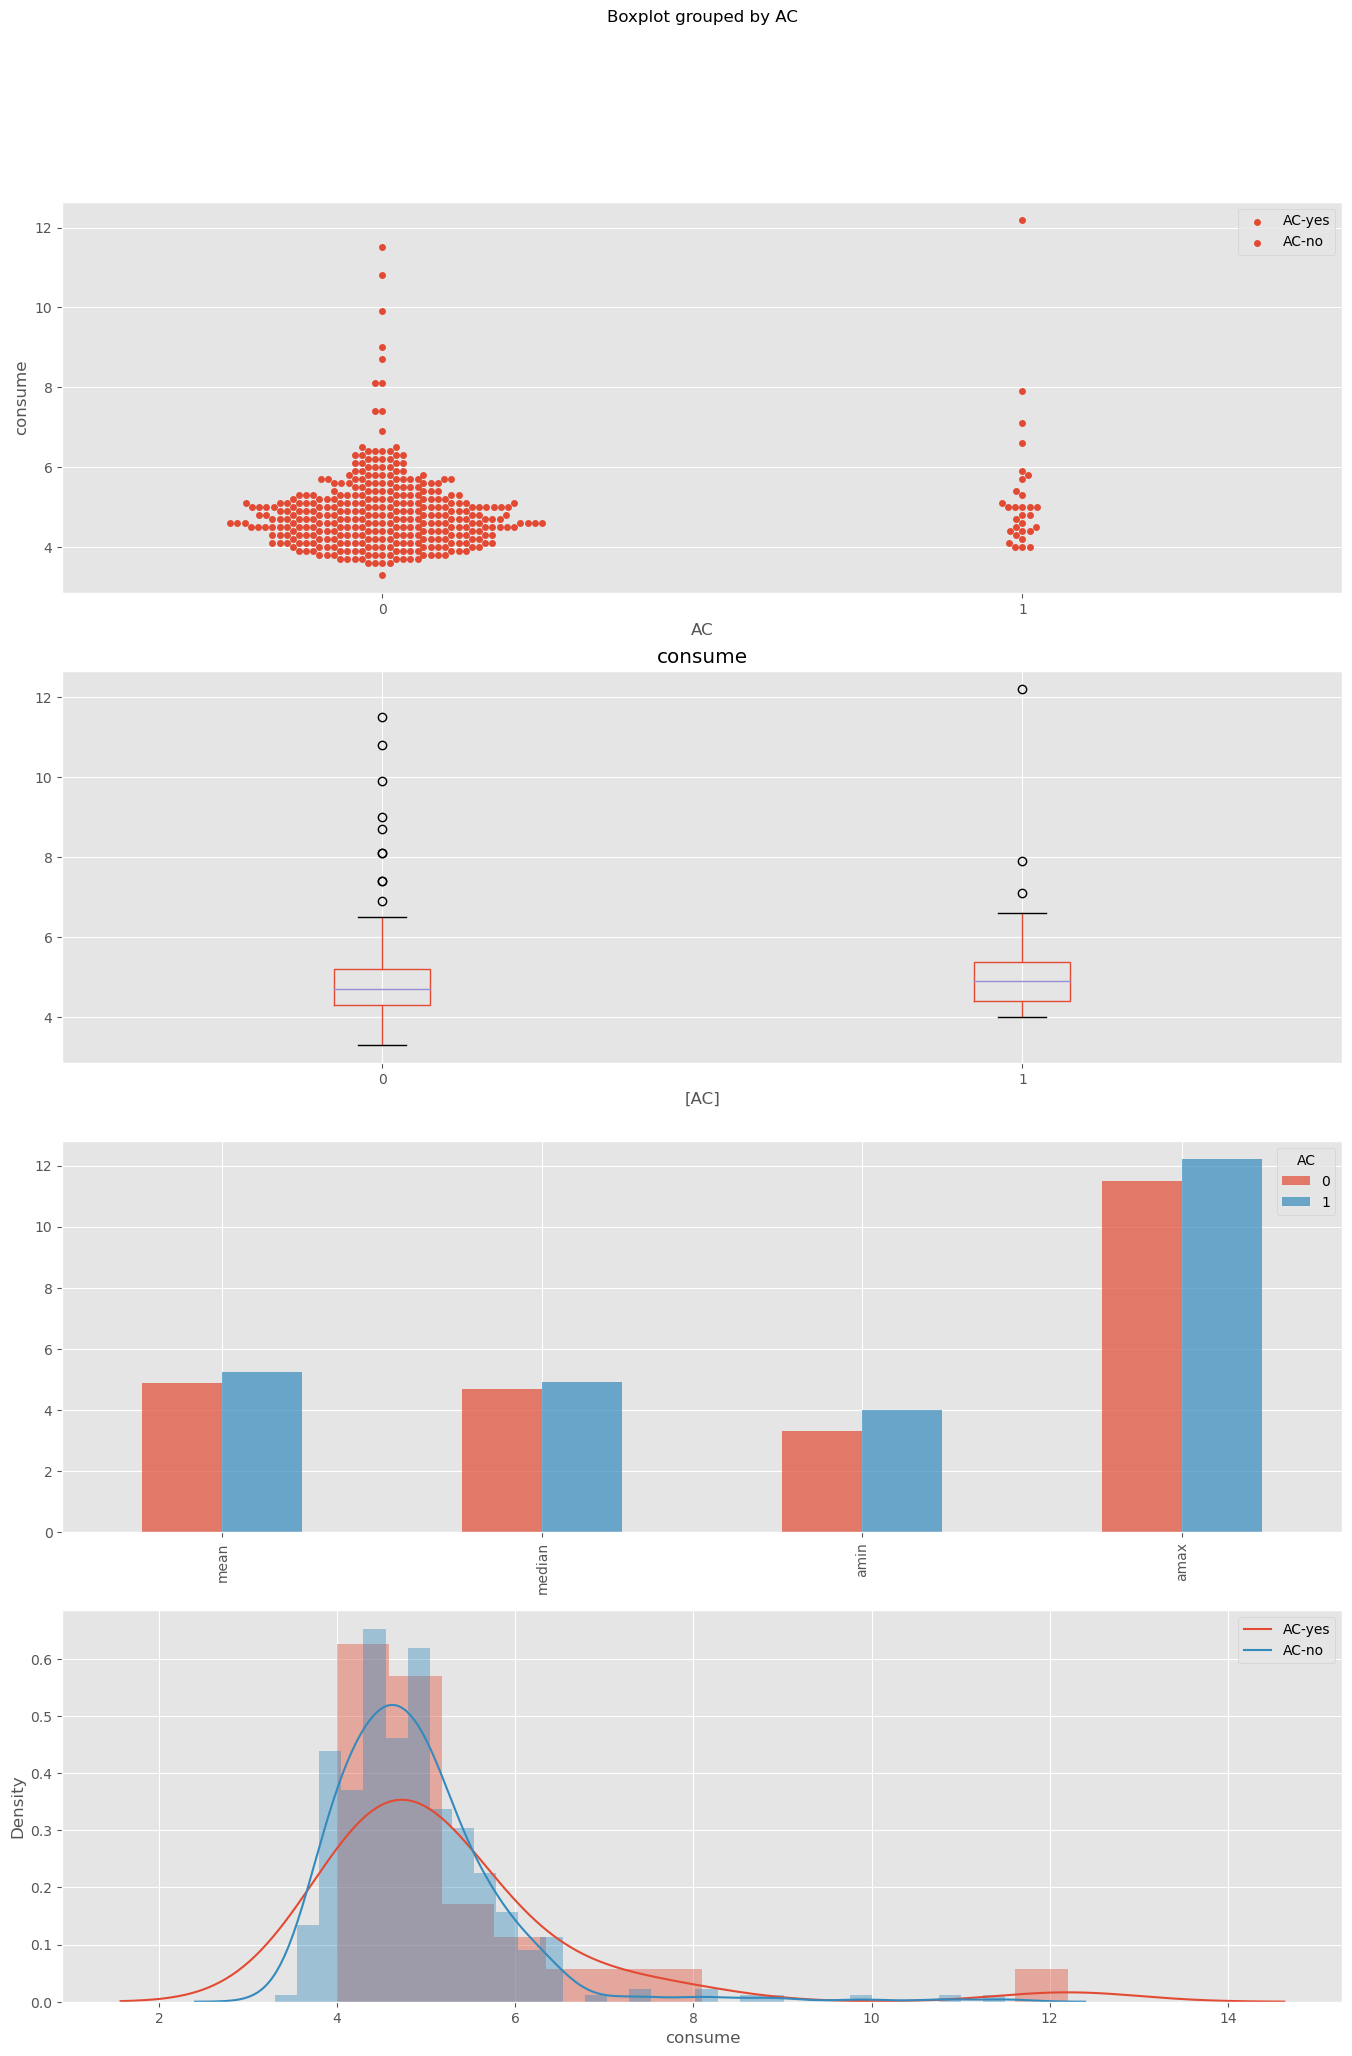

In [42]:
plt.figure(figsize=(16,24))

ax1=plt.subplot(4,1,1)
sns.swarmplot(x=df.AC,y=df.consume,ax=ax1)
plt.legend(["AC-yes","AC-no"])

ax2=plt.subplot(4,1,2)
t=df[["consume","AC"]]
k3=t.boxplot(by="AC",ax=ax2)
  

ax3=plt.subplot(4,1,3)
c=df.groupby("AC")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax3, alpha=0.7)

ax4=plt.subplot(4,1,4)
sns.distplot(df[df.AC==1].consume,ax=ax4)
sns.distplot(df[df.AC==0].consume,ax=ax4)
plt.legend(["AC-yes","AC-no"])

### Distance vs. Consumption

Text(0.5, 1.0, 'distance & consume')

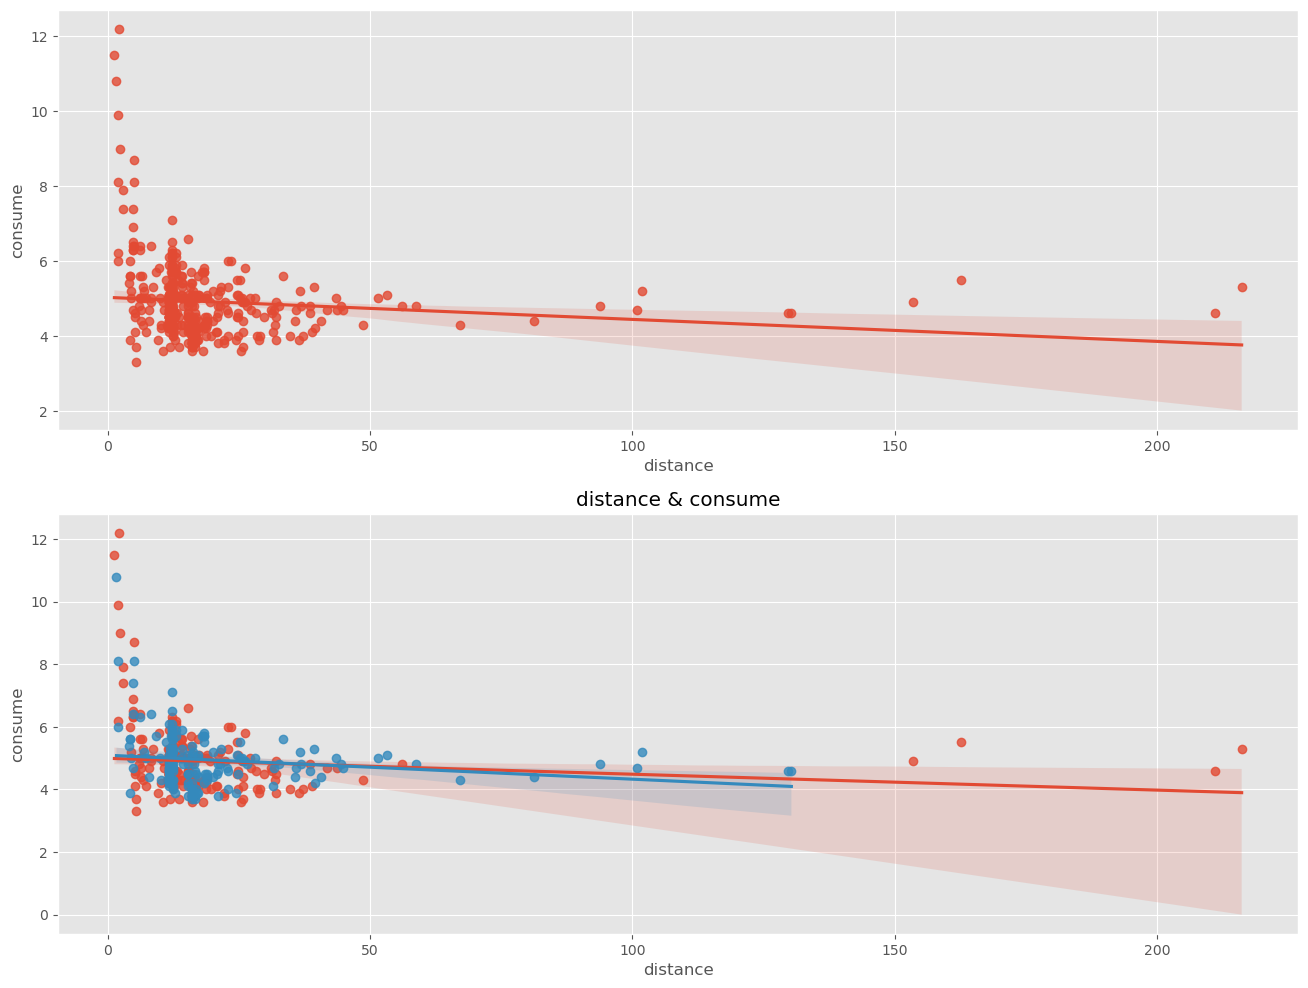

In [58]:
plt.figure(figsize=(16,12))

ax1=plt.subplot(2,1,1)
# regression line scatterplot：
sns.regplot(x=df['distance'], y=df['consume'],ax=ax1)
plt.xlabel("distance")
plt.ylabel("consume")


ax2=plt.subplot(2,1,2)
# regression line scatterplot：
line1=sns.regplot(x=df[df["gas_type"]=="SP98"]['distance'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax2, label='SP98')
line2=sns.regplot(x=df[df["gas_type"]=="E10"]['distance'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax2, label='E10')
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")





### Speed vs. Consumption

Text(0.5, 1.0, 'speed & consume')

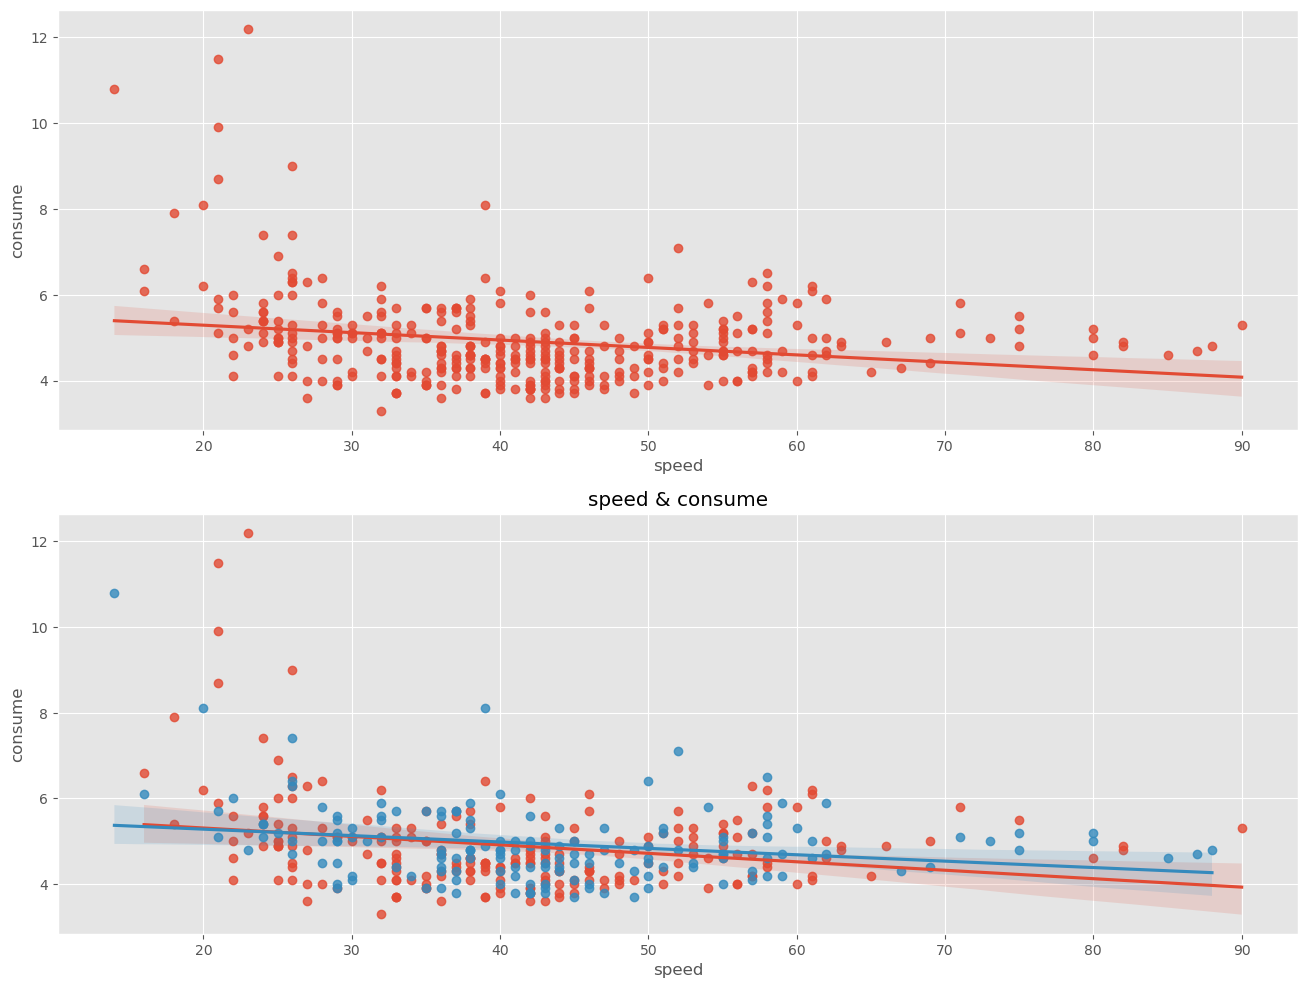

In [59]:
plt.figure(figsize=(16,12))

ax1=plt.subplot(2,1,1)
# regression line scatterplot：
sns.regplot(x=df['speed'], y=df['consume'],ax=ax1)
plt.xlabel("speed")
plt.ylabel("consume")


ax2=plt.subplot(2,1,2)
# regression line scatterplot：
line1=sns.regplot(x=df[df["gas_type"]=="SP98"]['speed'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax2, label='SP98')
line2=sns.regplot(x=df[df["gas_type"]=="E10"]['speed'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax2, label='E10')
plt.xlabel("speed")
plt.ylabel("consume")
plt.title("speed & consume")



### Speed vs. Distance

Text(0, 0.5, 'distance')

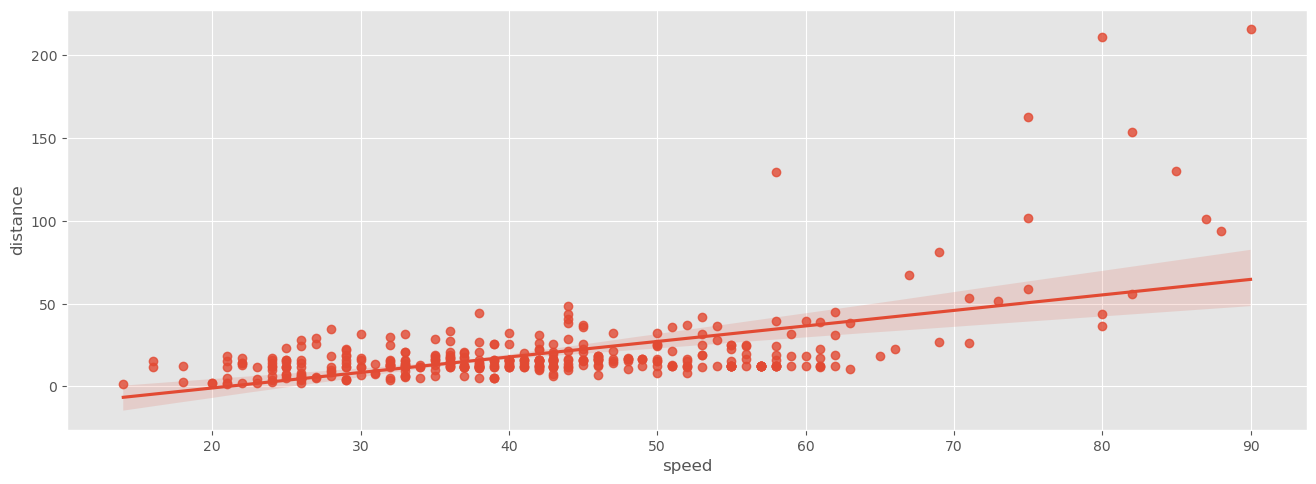

In [60]:
plt.figure(figsize=(16,12))

ax1=plt.subplot(2,1,1)
# regression line scatterplot：
sns.regplot(x=df['speed'], y=df['distance'],ax=ax1)
plt.xlabel("speed")
plt.ylabel("distance")



# 3. Modelling consumption

In [78]:
df.loc[df['gas_type'] == 'SP98', 'gas_type'] = 0
df.loc[df['gas_type'] == 'E10', 'gas_type'] = 1

df = df.astype({'gas_type':int})

In [80]:
X = df.drop('consume',axis=1)
y = df['consume']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
287,28.8,35,22.0,15,0,0,0,1
56,11.8,24,21.5,7,0,0,0,0
8,4.9,26,21.5,4,1,0,0,0
313,11.3,38,22.0,17,0,0,0,0
134,4.2,26,21.5,5,0,0,0,0
...,...,...,...,...,...,...,...,...
323,16.5,48,22.0,15,0,0,0,0
192,12.1,43,22.0,4,0,0,0,0
117,22.9,42,23.0,4,0,0,1,0
47,16.0,25,21.5,8,0,0,0,0


### Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [86]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))

Root Mean Squared Error(RMSE): 1.225019368476257
Mean Absolute Error(MAE): 0.6959261975000177
Mean Squared Error(MSE): 1.500672453141967


### Compute the SHAP values for the linear model

In [87]:
import shap

In [89]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", reg.coef_[i].round(5))

Model coefficients:

distance = 0.00213
speed = -0.01372
temp_inside = -0.01674
temp_outside = -0.04182
gas_type = -0.00103
AC = 0.3847
rain = 0.55364
sun = -0.21976


In [101]:
explainer = shap.Explainer(reg.predict, X)
shap_values = explainer(X)

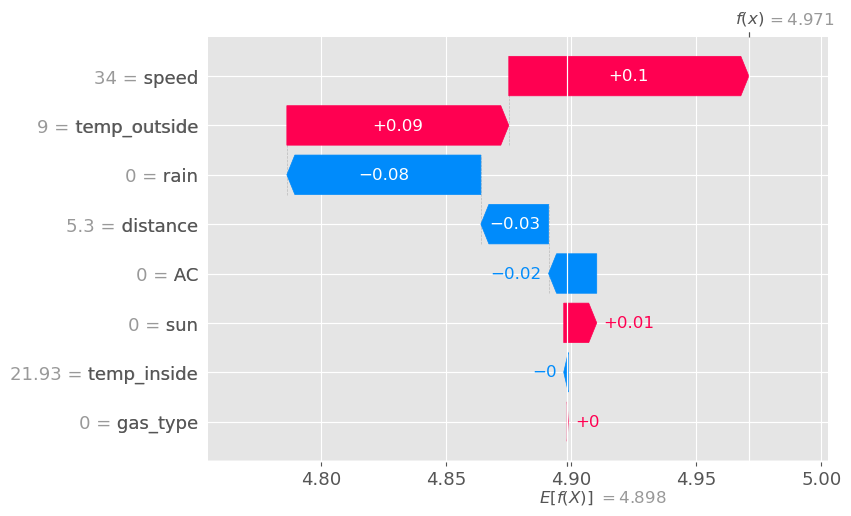

In [109]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[100])

# 4. Hypothesis testing

In [120]:
from scipy import stats

What we are aiming here is to decide between the best fuel. So it's not a matter of prediction, but a matter of testing hypothesis.

Technically speaking, E10 and SP98 aren't choices a driver can make, because they are the same type of gasoline. It's just a matter of european legislations that regulate the composition of the gas.

For the purpose of the exercise, however, we will assume that SP98 is a  E10 is diesel, so they have different prices and using one or another is a choice a consumer can make when buying a car.

Gasoline prices per litre, octane-95: We show prices for Barcelona from 17-Oct-2022 to 23-Jan-2023. The average value for Barcelona during that period was 1.68 Euro with a minimum of 1.57 Euro on 19-Dec-2022 and a maximum of 1.79 Euro on 07-Nov-2022. For comparison, the average price of gasoline in the world for this period is 1.72 Euro. Use the drop menu to see the prices in gallons.

Diesel prices: We show prices for Barcelona from 17-Oct-2022 to 23-Jan-2023. The average value for Barcelona during that period was 1.79 Euro with a minimum of 1.65 Euro on 19-Dec-2022 and a maximum of 1.96 Euro on 17-Oct-2022. For comparison, the average price of diesel in the world for this period is 1.72 Euro.

- SP98 = 1.68 €/l  
- E10 = 1.79 €/l

In [61]:
import statsmodels.api as sm

### TEST 1: Adding a price column

In [111]:
sp98_price = 1.68
e10_price = 1.79

In [112]:
df_SP98['price'] = df_SP98['consume']*sp98_price
df_E10['price'] = df_E10['consume']*e10_price


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [114]:
print('SP98: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df_SP98['price']), 
                                                                       np.std(df_SP98['price']),
                                                                       df_SP98['price'].count()))
print('E10: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df_E10['price']), 
                                                                       np.std(df_E10['price']),
                                                                       df_E10['price'].count()))

SP98: mean 8.231, standard deviation 1.875, samples 228
E10: mean 8.827, standard deviation 1.608, samples 160


E10 seems to be more expensive, but let's make an hypothesis testing.

In [131]:
sp98 = df_SP98['price'].iloc[:len(e10)] #same length arrays
e10 = df_E10['price']

In [132]:
def check_normality(data, significance):
    test_stat_normality, p_value_normality = stats.shapiro(data)
    print('p_value', p_value_normality)
    if p_value_normality < significance:
        print('reject null hypotesis: data not normally distributed')
    else:
        print('no evidence to reject null hypotesis: data sampled from normal')
  

In [133]:
check_normality(sp98, 0.05)
check_normality(e10, 0.05)

p_value 2.957796700164654e-15
reject null hypotesis: data not normally distributed
p_value 1.4005675959272157e-12
reject null hypotesis: data not normally distributed


In [134]:
# data is not normal, so instead of the t-test we need to run the wilcoxon test

**significance level = 0.05 (95% confidence)  
goal: check if the difference of the mean is positive or negative, to know wich one is performing better**

In [135]:
# H0: there is no difference between sp98 and e10
# HA: the difference between sp98 - e10 is negative (less), meaning that e10 is more expensive.

### wilcoxon test

In [136]:
test, pvalue = stats.wilcoxon(sp98, e10, alternative='less') # here we add the alternative statement, which is defined as to be less than
print('pvalue', pvalue)
if pvalue < 0.05:
    print("reject null hypothesis")
else:
    print("no evidence to reject the null hypothesis")
    

pvalue 0.034158390731814904
reject null hypothesis


### TEST 2: Checking if sp98 and e10 cost the same price

In [171]:
sp98_price = 1.68
e10_price = 1.68

In [172]:
df_SP98['price'] = df_SP98['consume']*sp98_price
df_E10['price'] = df_E10['consume']*e10_price


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [173]:
print('SP98: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df_SP98['price']), 
                                                                       np.std(df_SP98['price']),
                                                                       df_SP98['price'].count()))
print('E10: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df_E10['price']), 
                                                                       np.std(df_E10['price']),
                                                                       df_E10['price'].count()))

SP98: mean 8.231, standard deviation 1.875, samples 228
E10: mean 8.284, standard deviation 1.509, samples 160


E10 seems to be more expensive, but let's make an hypothesis testing.

In [174]:
sp98 = df_SP98['price'].iloc[:len(e10)] #same length arrays
e10 = df_E10['price']

### wilcoxon test

In [179]:
test, pvalue = stats.wilcoxon(sp98, e10, alternative='less') # here we add the alternative statement, which is defined as to be less than
print('pvalue', pvalue)
if pvalue < 0.05:
    print("reject null hypothesis")
else:
    print("no evidence to reject the null hypothesis")
    

pvalue 0.9500957261029774
no evidence to reject the null hypothesis


### TEST 3: Try-testing the prices

In [252]:
sp98_price = 1.68
e10_price = 1.78

In [253]:
df_SP98['price'] = df_SP98['consume']*sp98_price
df_E10['price'] = df_E10['consume']*e10_price


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [254]:
print('SP98: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df_SP98['price']), 
                                                                       np.std(df_SP98['price']),
                                                                       df_SP98['price'].count()))
print('E10: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df_E10['price']), 
                                                                       np.std(df_E10['price']),
                                                                       df_E10['price'].count()))

SP98: mean 8.231, standard deviation 1.875, samples 228
E10: mean 8.778, standard deviation 1.599, samples 160


E10 seems to be more expensive, but let's make an hypothesis testing.

In [255]:
sp98 = df_SP98['price'].iloc[:len(e10)] #same length arrays
e10 = df_E10['price']

In [260]:
test, pvalue = stats.wilcoxon(sp98, e10, alternative='less') # here we add the alternative statement, which is defined as to be less than
print('pvalue', pvalue)
if pvalue < 0.05:
    print("reject null hypothesis")
else:
    print("no evidence to reject the null hypothesis")
    

pvalue 0.06712968974916307
no evidence to reject the null hypothesis


# 5. Conclusions

From the EDA, we could see that the gas type doesn't seem to have a significant impact on the performance of the cars. Or at leat, the impact is no completely inclined towards a specific gas_type:
- While E10 seems to perform better in long distances, it tends to consume more in shorter distances.  
- While SP98 seems to perform better at higher speeds, there is almost no difference for short trips.


Taking into consideration that short trips are much more frequent than long distance trips, further considerations were needed.  
The basic logistic regression model we built to predict consumption shed some light on the most relevant features. The waterfall analysis of the shap values proved that:
- consumption doesn't seem to be related to the gas_type
- higher speed and outside temperature seem to be directly related to consumption growth
- rain and higher distance seem to decreade the consumption

From the analysis above, we tend to ratify what the literature already says: the adding of ethanol does not have a significant impact on the car performance. In fact, SP98 already have a pecentage of ethanol, and the legislations is only aiming at making it more clear for consumers.  

What seems to have a significant impact is related to the driver uses of the car. Higher temperatures can be related to the use of AC systems inside the car, while rain may influence the speed of the driving. Both are coherent the data itself and the general intuition.

The question whether using the e10 instead of sp98 is reasonable, only makes sense economically speaking.

For the prices we have checked online, for mean values in Spain for las 4 months, there is evidence to say that e10 is more expensive than sp98.   
As a general rule, we could verify that if e10 costs between 0 and 0.10 euros more than sp98, the economic cost is statistically irrelevant. However, if the price sp98 - e10 is higher than 0.10 euros, it begins to be statistically relevant in terms of economic savings. 